In [9]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid   # Unique identifier
import os
import time

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/vishwajithp/Downloads/train/exp2/weights/last.pt')

Using cache found in /Users/vishwajithp/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-19 Python-3.11.8 torch-2.2.1 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [11]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [12]:
img = os.path.join('data', 'images', 'drowsy.849b2e74-e54e-11ee-90aa-a684ed581201.jpg')

In [13]:
results = model(img)

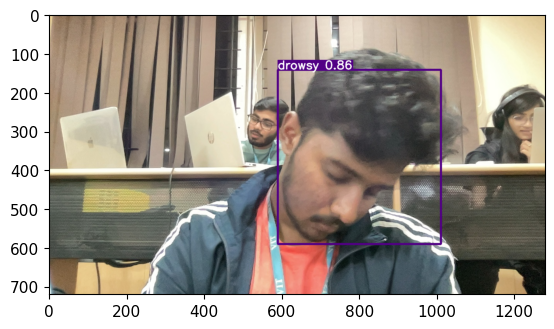

In [14]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
import os
status=[]
conf=[]
cap = cv2.VideoCapture(0)
count=0
count1=0
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)

    for det in results.pred[0]:
        class_index=int(det[5])
        class_labels=results.names[class_index]
        confidence=det[4]
        bbox=det[:4]
        status.append(class_labels)
        conf.append(confidence)

     
        
        if class_labels=='drowsy':
            count+=1
        else:
            count1+=1
        if count1>2:
            count1=0
            count=0
        elif count>5:
            count=0
            os.system("afplay /System/Library/Sounds/Glass.aiff")
            
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [16]:
status


['drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'awake',
 'drowsy',
 'awake',
 'drowsy',
 'awake',
 'drowsy',
 'awake',
 'drowsy',
 'awake',
 'drowsy',
 'awake',
 'drowsy',
 'awake',
 'drowsy',
 'awake',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'awake',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'awake',
 'drowsy',
 'drowsy',
 'awake',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'drowsy',
 'awake',
 'drowsy',
 'awake',
 'drowsy',
 'awake',
 'drowsy',
 'drowsy',
 'drowsy',
 '

In [17]:
for i in conf:
    print(i.item())

0.8807346820831299
0.8896223306655884
0.8903490304946899
0.8919677734375
0.8999208807945251
0.8919681310653687
0.77918541431427
0.7205650806427002
0.7371687889099121
0.7731296420097351
0.7743198275566101
0.8341332077980042
0.8356591463088989
0.8398916125297546
0.8437473773956299
0.858036994934082
0.8091791272163391
0.8760380148887634
0.9201263189315796
0.7660552263259888
0.8900941610336304
0.5360534191131592
0.7767778635025024
0.5183209180831909
0.8395217061042786
0.7983319759368896
0.8497028946876526
0.8067218065261841
0.8930873274803162
0.8439250588417053
0.8042675852775574
0.75249844789505
0.877181351184845
0.8639634251594543
0.9018369317054749
0.8738194108009338
0.8789428472518921
0.8688981533050537
0.8721957802772522
0.8576794862747192
0.8812336325645447
0.8490645885467529
0.8958234786987305
0.29684725403785706
0.9196432828903198
0.3128971755504608
0.9224711060523987
0.3191722333431244
0.890547513961792
0.28659752011299133
0.9059178829193115
0.36994585394859314
0.8463138937950134
